# Board Game Recommender
## User based review collaborative filtering

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#ML Packages

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

# Step 1: Clean and Prepare Data

## EDA


### Explore the games data, then clean and transform into a useable format

In [2]:
# Import games data
df = pd.read_csv('games.csv')

df_games = df.copy(deep=True)

df_games.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0


In [3]:
#get description of features in df

df_games.info()
df_describe = df_games.describe()

with pd.option_context('display.max_columns', None):
  display(df_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   AvgRating            21925 non-null  float64
 6   BayesAvgRating       21925 non-null  float64
 7   StdDev               21925 non-null  float64
 8   MinPlayers           21925 non-null  int64  
 9   MaxPlayers           21925 non-null  int64  
 10  ComAgeRec            16395 non-null  float64
 11  LanguageEase         16034 non-null  float64
 12  BestPlayers          21925 non-null  int64  
 13  GoodPlayers          21925 non-null  object 
 14  NumOwned             21925 non-null  int64  
 15  NumWant              21925 non-null 

,BGGId,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,BestPlayers,NumOwned,NumWant,NumWish,NumWeightVotes,MfgPlaytime,ComMinPlaytime,ComMaxPlaytime,MfgAgeRec,NumUserRatings,NumComments,NumAlternates,NumExpansions,NumImplementations,IsReimplementation,Kickstarted,Rank:boardgame,Rank:strategygames,Rank:abstracts,Rank:familygames,Rank:thematic,Rank:cgs,Rank:wargames,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,16395.000000,16034.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.0,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.00000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,1985.494914,1.982131,6.424922,5.685673,1.516374,2.007343,5.707868,10.004391,216.461819,0.311517,1467.848164,41.690946,228.457013,49.480137,90.513523,63.678586,90.513523,9.613409,861.668324,0.0,1.603786,1.380068,0.308734,0.116762,0.153341,11019.514071,19729.826956,20839.347184,19732.270011,20736.185815,21625.086796,18680.185678,21295.352201,21062.680274,0.055827,0.10577,0.161003,0.105633,0.013820,0.050855,0.029190,0.040182
std,104628.721777,212.486214,0.848983,0.932477,0.365311,0.285578,0.693093,15.014643,3.269157,236.595136,1.067002,5294.120574,117.255229,788.477151,205.762375,529.657389,443.916212,529.657389,3.641560,3638.680857,0.0,9.619364,7.701036,0.848095,0.321143,0.360324,6372.926817,6389.614077,4695.170448,6387.089598,4893.928466,2542.033794,7420.906104,3637.139987,4219.776597,0.229592,0.30755,0.367542,0.307374,0.116745,0.219707,0.168344,0.196391
min,1.000000,-3500.000000,0.000000,1.041330,3.574810,0.196023,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,2001.000000,1.333300,5.836960,5.510300,1.320720,2.000000,4.000000,8.000000,24.027778,0.000000,150.000000,3.000000,14.000000,4.000000,25.000000,20.000000,25.000000,8.000000,56.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5488.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,2011.000000,1.968800,6.453950,5.546540,1.476880,2.000000,4.000000,10.000000,138.000000,0.000000,320.000000,9.000000,39.000000,9.000000,45.000000,30.000000,45.000000,10.000000,123.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,11022.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,2017.000000,2.525200,7.052450,5.679890,1.665470,2.000000,6.000000,12.000000,351.000000,0.000000,899.000000,28.000000,127.000000,26.000000,90.000000,60.000000,90.000000,12.000000,395.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,16544.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,2021.000000,5.000000,9.914290,8.514880,4.277280,10.000000,999.000000,21.000000,1757.000000,15.000000,166497.000000,2031.000000,19182.000000,7673.000000,60000.000000,60000.000000,60000.000000,25.000000,108101.000000,0.0,850.000000,525.000000,38.000000,1.000000,1.000000,21926.000000

In [4]:
df_na = df_games[df_games['Description'].isnull()]
print(df_na)
# Set description of game to its name
df_games.loc[14243, 'Description'] = 'Timeline: Sports et Loisirs'

        BGGId                         Name Description  YearPublished  \
14243  170984  Timeline: Sports et Loisirs         NaN           2014   

       GameWeight  AvgRating  BayesAvgRating   StdDev  MinPlayers  MaxPlayers  \
14243         1.0    6.64387         5.53658  1.62527           2           8   

       ...  Rank:partygames  Rank:childrensgames  Cat:Thematic Cat:Strategy  \
14243  ...            21926                21926             0            0   

       Cat:War  Cat:Family  Cat:CGS  Cat:Abstract  Cat:Party  Cat:Childrens  
14243        0           0        0             0          0              0  

[1 rows x 48 columns]


In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21925 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   AvgRating            21925 non-null  float64
 6   BayesAvgRating       21925 non-null  float64
 7   StdDev               21925 non-null  float64
 8   MinPlayers           21925 non-null  int64  
 9   MaxPlayers           21925 non-null  int64  
 10  ComAgeRec            16395 non-null  float64
 11  LanguageEase         16034 non-null  float64
 12  BestPlayers          21925 non-null  int64  
 13  GoodPlayers          21925 non-null  object 
 14  NumOwned             21925 non-null  int64  
 15  NumWant              21925 non-null 

In [6]:
# check if all BGGIds are unique
df_games['BGGId'] = df_games['BGGId'].astype('string')

df_games['BGGId'].describe()

count     21925
unique    21925
top           1
freq          1
Name: BGGId, dtype: object

In [7]:
#for features with categorical data

df_games.describe(include=('object', 'bool'))

,Name,Description,GoodPlayers,Family,ImagePath
count,21925,21925,21925,6663,21908
unique,21521,21904,78,1456,21904
top,Robin Hood,dice throne game intriguing dice tactical card...,[],18xx,https://cf.geekdo-images.com/6vlkpViMExKmOvg0C...
freq,6,4,19946,103,2


In [8]:
df_games['ImagePath'][0]

'https://cf.geekdo-images.com/rpwCZAjYLD940NWwP3SRoA__original/img/yR0aoBVKNrAmmCuBeSzQnMflLYg=/0x0/filters:format(jpeg)/pic4718279.jpg'

In [9]:
#df_games.set_index('Name', inplace=True)

In [10]:
#df_games.head()

### While there may be duplicate names, the BGG identities are unique. As we may have version differences that or different games with the same name, we will use the BGGId as the identifier.

In [11]:
# Import rating data
df1 = pd.read_csv('user_ratings.csv')

df_rating = df1.copy(deep=True)

df_rating.shape

(18942215, 3)

In [12]:
df_rating.info()
df_describe2 = df_rating.describe()

with pd.option_context('display.max_columns', None):
  display(df_describe2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18942215 entries, 0 to 18942214
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   BGGId     int64  
 1   Rating    float64
 2   Username  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 433.6+ MB


,BGGId,Rating
count,1.894222e+07,1.894222e+07
mean,1.099533e+05,7.130957e+00
std,9.280217e+04,1.543023e+00
min,1.000000e+00,1.000000e-04
25%,1.611000e+04,6.000000e+00
50%,1.075290e+05,7.000000e+00
75%,1.813040e+05,8.000000e+00
max,3.491610e+05,1.000000e+01


In [13]:
# check if we have same number of unique BGGIds - 21925
df_rating['BGGId'] = df_rating['BGGId'].astype('string')

df_rating['BGGId'].describe()

count     18942215
unique       21925
top          30549
freq        107760
Name: BGGId, dtype: object

In [14]:
# For features with categorical data

df_rating.describe(include=('object'))

,Username
count,18942152
unique,411374
top,oldgoat3769967
freq,6493


## That is a lot of reviews!
## -----------------------------------------------------------------------------------------





In [15]:
# Import mechanics data
df2 = pd.read_csv('mechanics.csv')

df_mech = df2.copy(deep=True)

df_mech.describe()

,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,0.001688,0.074755,0.052771,0.295827,0.205063,0.054002,0.018335,0.111197,0.001870,...,0.006249,0.000228,0.000867,0.002828,0.000684,0.002919,0.000730,0.001460,0.050399,0.020935
std,104628.721777,0.041046,0.263001,0.223581,0.456424,0.403757,0.226027,0.134164,0.314383,0.043204,...,0.078802,0.015100,0.029426,0.053103,0.026148,0.053950,0.027005,0.038177,0.218772,0.143170
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Import themes data
df3 = pd.read_csv('themes.csv')

df_theme = df3.copy(deep=True)

df_theme.describe()

,BGGId,Adventure,Fantasy,Fighting,Environmental,Medical,Economic,Industry / Manufacturing,Transportation,Science Fiction,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,0.053683,0.123238,0.076078,0.008848,0.003968,0.069282,0.013546,0.018016,0.076397,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
std,104628.721777,0.225396,0.328718,0.265128,0.093651,0.062869,0.253938,0.115600,0.133012,0.265638,...,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Import subcategories data
df4 = pd.read_csv('subcategories.csv')

df_subcat = df4.copy(deep=True)

df_subcat.head()

,BGGId,Exploration,Miniatures,Territory Building,Card Game,Educational,Puzzle,Collectible Components,Word Game,Print & Play,Electronic
0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0


# Filter data down to users and games that meet thresholds

## We will set a rating number threshold for users to reduce sparsity of data

Text(190.34722222222223, 0.5, 'Count')

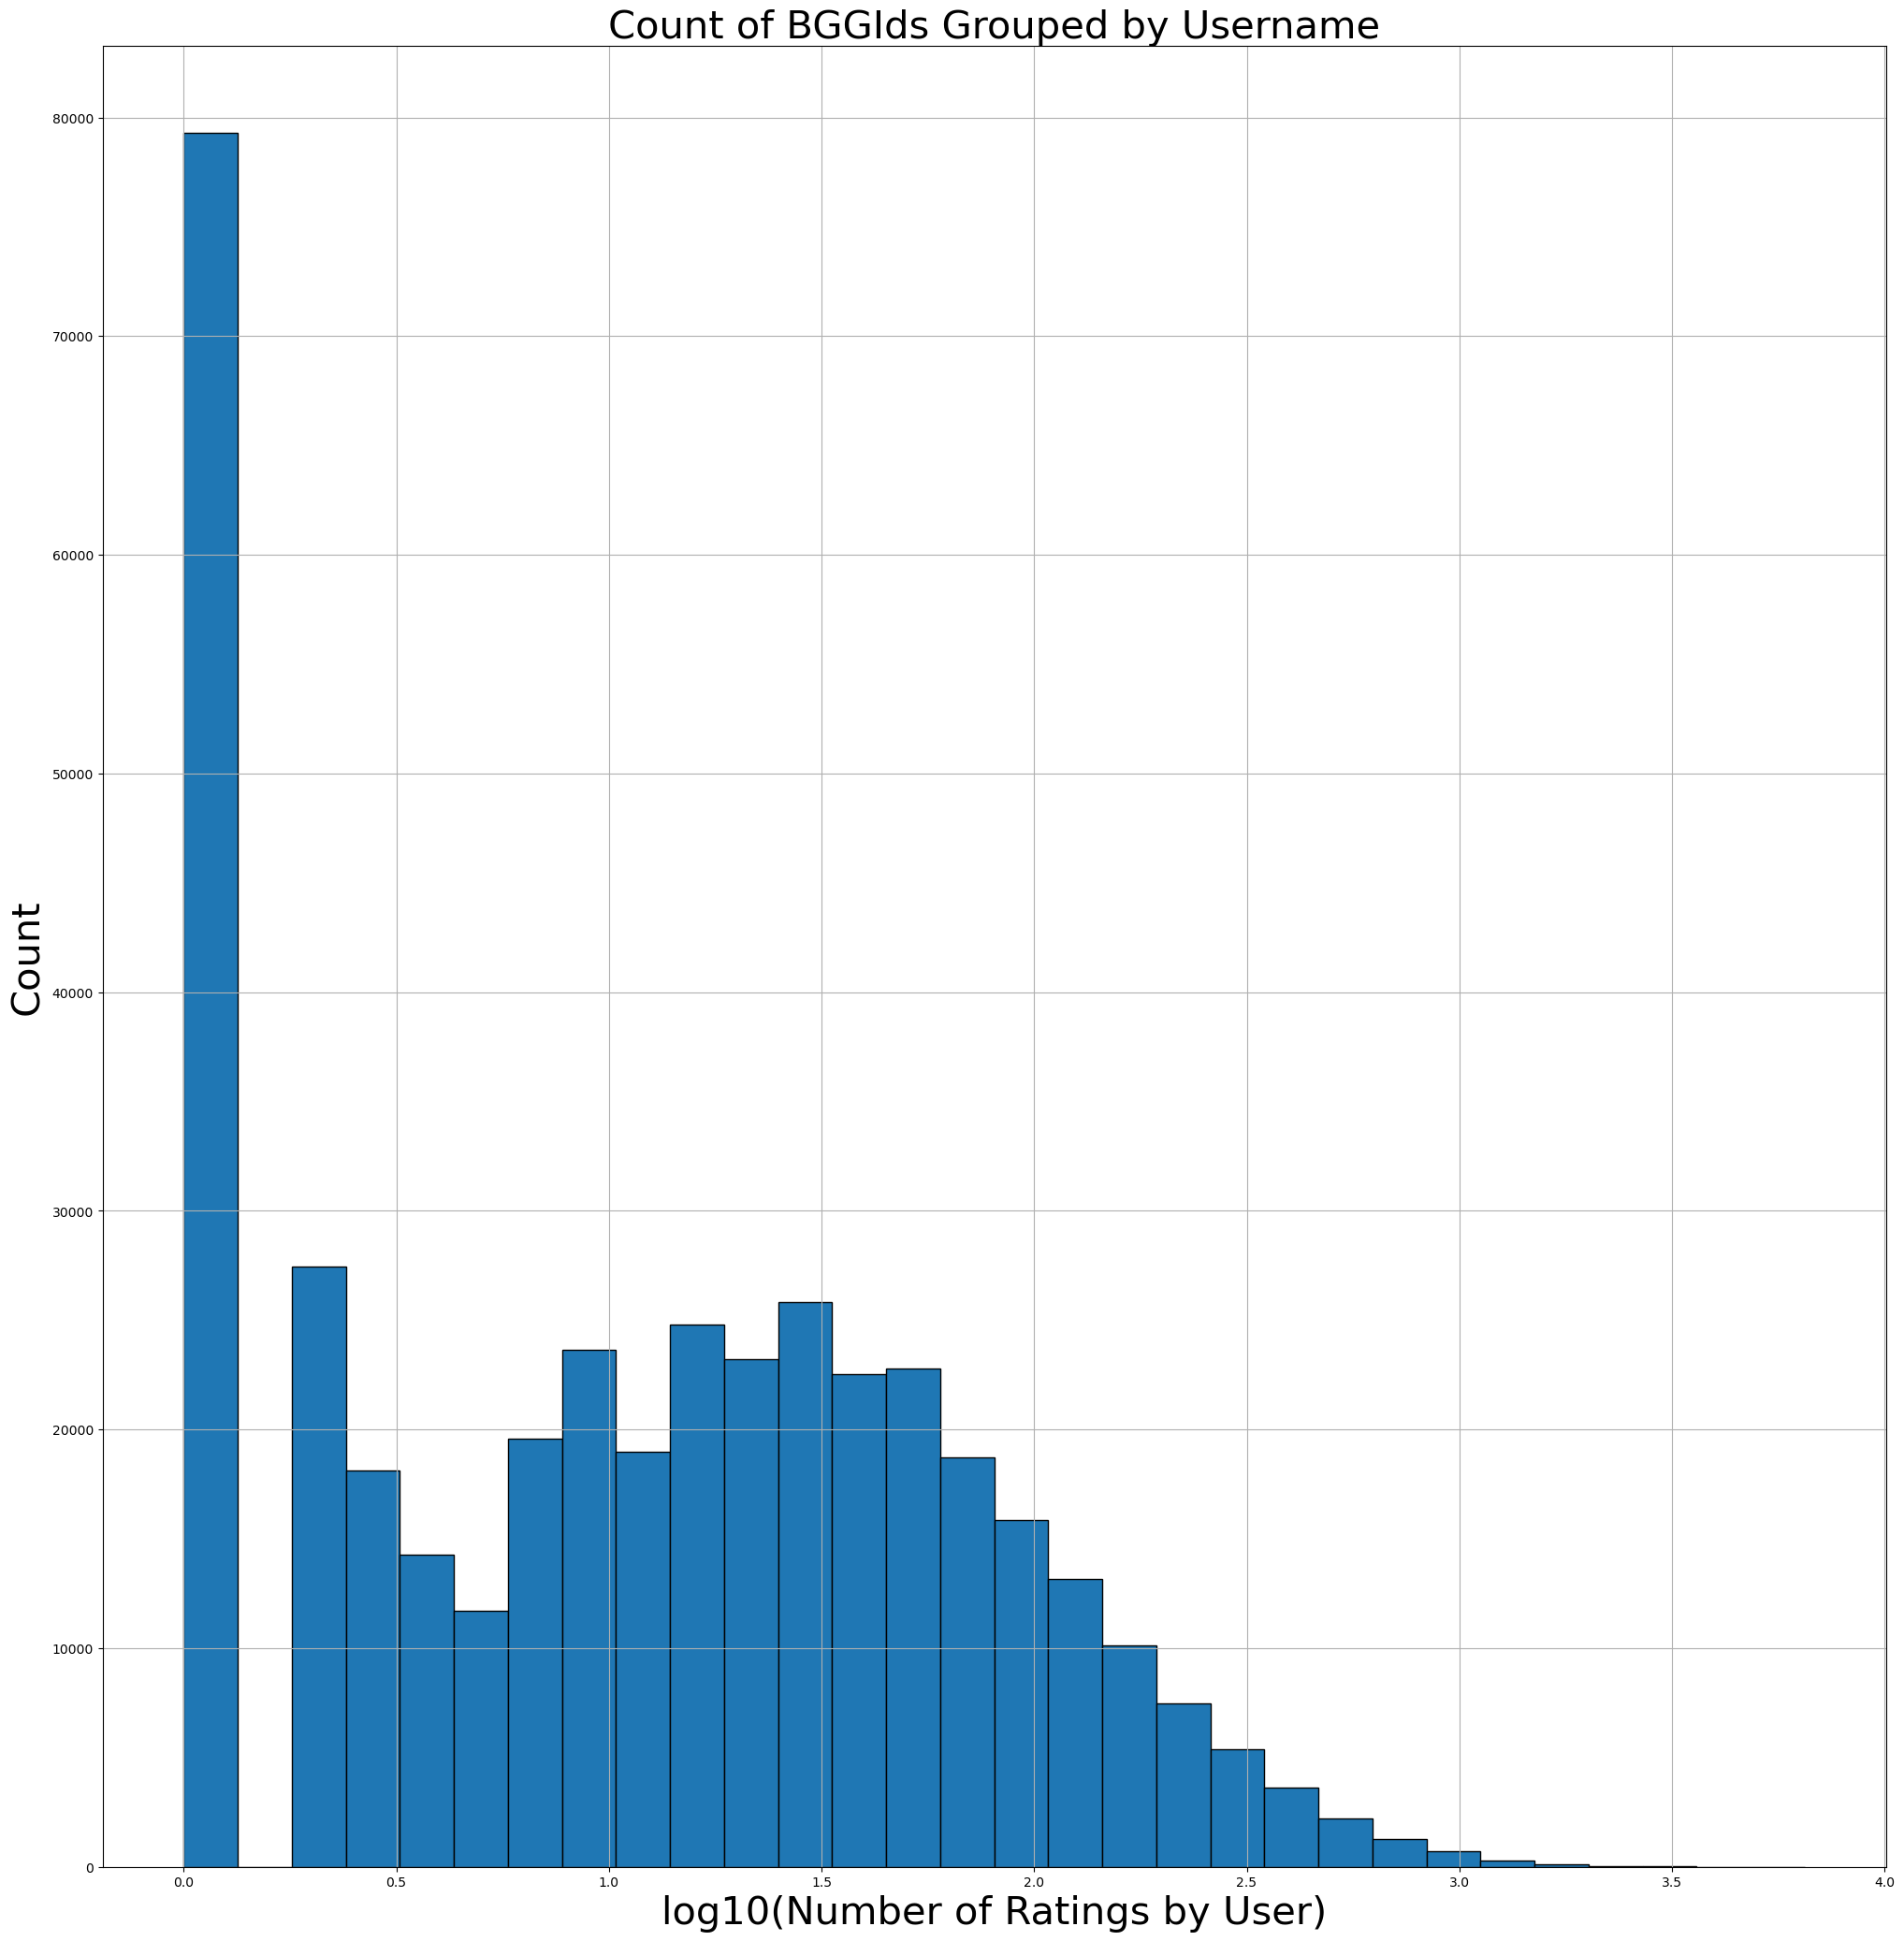

In [18]:
# To get an idea of where to set the threshold for number of ratings per user, we will visualize
#display as log base10 for easier visualization
np.log10(df_rating.groupby('Username').count()['BGGId']).hist(figsize=(20,20), bins=30, ec='black')
plt.tight_layout()
plt.title('Count of BGGIds Grouped by Username', size=30)
plt.xlabel('log10(Number of Ratings by User)', size=30)
plt.ylabel('Count', size=30)

## There is a significant amount of users who have left either no reviews (or less than 10), but we will start have a significant amount of users if we set the threshold even to 50.

In [19]:
threshold_user = df_rating.groupby('Username').count()['BGGId'] >= 50

user_mask = threshold_user[threshold_user].index
print(user_mask)

df_users = df_rating[df_rating['Username'].isin(user_mask)]

df_users['BGGId'].describe()

Index(['-=Yod@=-', '-Johnny-', '-Loren-', '-Morphling-', '-mIDE-', '-toni-',
       '...Hammer', '.JcK.', '0 1 1 2 3 5 8', '000Ryuk000',
       ...
       'zzjefke', 'zzrunner', 'zztap', 'zzyzewitsch', 'zzyzxuk', 'zzzabiss',
       'zzzeagle', 'zzzhsm', 'zzzoren', 'zzzzzane'],
      dtype='object', name='Username', length=93637)


count     15182241
unique       21924
top          30549
freq         60634
Name: BGGId, dtype: object

In [20]:
# Find Missing Review
missing_values = set(df_users.iloc[:,0]).symmetric_difference(set(df_games.iloc[:, 0]))
print(missing_values)

{'225932'}


In [21]:
# Pulling one review to get game into pivot table
df_users.loc[-1] = ['225932', 6.0, 'SorryNewGame']

missing_values = set(df_users.iloc[:,0]).symmetric_difference(set(df_games.iloc[:, 0]))
print(missing_values)

C:\Users\tdkla\AppData\Local\Temp\ipykernel_432\1947001911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users.loc[-1] = ['225932', 6.0, 'SorryNewGame']


set()


In [22]:
#merge user_ratings and games dataframes

df_merged = df_games.merge(df_users, on='BGGId', how='inner')

df_merged.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating,Username
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,0,1,0,0,0,0,0,0,4.0,ArashDaemon666
1,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,0,1,0,0,0,0,0,0,4.0,SWxNW
2,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,0,1,0,0,0,0,0,0,4.0,Dr_Dog
3,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,0,1,0,0,0,0,0,0,4.0,kittykat27
4,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,0,1,0,0,0,0,0,0,4.0,PoisonKiwi


In [23]:
df_merged.info()

df_merged.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15182242 entries, 0 to 15182241
Data columns (total 50 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BGGId                object 
 1   Name                 object 
 2   Description          object 
 3   YearPublished        int64  
 4   GameWeight           float64
 5   AvgRating            float64
 6   BayesAvgRating       float64
 7   StdDev               float64
 8   MinPlayers           int64  
 9   MaxPlayers           int64  
 10  ComAgeRec            float64
 11  LanguageEase         float64
 12  BestPlayers          int64  
 13  GoodPlayers          object 
 14  NumOwned             int64  
 15  NumWant              int64  
 16  NumWish              int64  
 17  NumWeightVotes       int64  
 18  MfgPlaytime          int64  
 19  ComMinPlaytime       int64  
 20  ComMaxPlaytime       int64  
 21  MfgAgeRec            int64  
 22  NumUserRatings       int64  
 23  NumComments          int64  
 

,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,BestPlayers,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating
count,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.477178e+07,1.473722e+07,1.518224e+07,...,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07,1.518224e+07
mean,1.993599e+03,2.278993e+00,7.055648e+00,6.615727e+00,1.380953e+00,1.974713e+00,5.542754e+00,1.001119e+01,9.954054e+01,2.581394e+00,...,2.147167e+04,1.467806e-01,3.986866e-01,5.497442e-02,3.296072e-01,1.970447e-02,5.573011e-02,8.263812e-02,2.108496e-02,6.997594e+00
std,2.112317e+02,8.161628e-01,7.516651e-01,7.564738e-01,1.913194e-01,6.936967e-01,9.492079e+00,2.375575e+00,1.662073e+02,1.965058e+00,...,3.096077e+03,3.538871e-01,4.896280e-01,2.279303e-01,4.700705e-01,1.389827e-01,2.293998e-01,2.753345e-01,1.436676e-01,1.515989e+00
min,-3.500000e+03,0.000000e+00,1.041330e+00,3.574810e+00,1.960230e-01,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-04
25%,2.005000e+03,1.656200e+00,6.658910e+00,5.972820e+00,1.242150e+00,2.000000e+00,4.000000e+00,8.194444e+00,2.781250e+00,0.000000e+00,...,2.192600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
50%,2.012000e+03,2.204900e+00,7.143370e+00,6.668270e+00,1.341700e+00,2.000000e+00,4.000000e+00,1.000000e+01,1.766667e+01,3.000000e+00,...,2.192600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
75%,2.016000e+03,2.833600e+00,7.556700e+00,7.189630e+00,1.484890e+00,2.000000e+00,6.000000e+00,1.182609e+01,1.262031e+02,4.000000e+00,...,2.192600e+04,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
max,2.021000e+03,5.000000e+00,9.914290e+00,8.514880e+00,4.277280e+00,1.000000e+01,9.990000e+02,2.100000e+01,1.757000e+03,1.500000e+01,...,2.192600e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01


## Create Pivot Table

In [34]:
df_game_x_user = df_merged.pivot_table(index='BGGId', columns='Username', values='Rating')

In [35]:
df_game_x_user.shape

(21925, 93638)

In [36]:
df_game_x_user.fillna(value=0, inplace=True)

In [37]:
df_game_x_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21925 entries, 1 to 99992
Columns: 93638 entries, -=Yod@=- to zzzzzane
dtypes: float64(93638)
memory usage: 15.3+ GB


In [38]:
df_game_names = pd.DataFrame()
df_game_names[['BGGId','Name']] = df_games[['BGGId','Name']]
df_game_names.head()

,BGGId,Name
0,1,Die Macher
1,2,Dragonmaster
2,3,Samurai
3,4,Tal der Könige
4,5,Acquire


In [39]:
df_game_x_user = df_game_names.merge(df_game_x_user, on='BGGId', how='inner')
df_game_x_user.reset_index(drop=True, inplace=True)
df_game_x_user.drop(columns=['BGGId'], inplace=True)
df_game_x_user.set_index('Name', inplace=True)
df_game_x_user.head()

,-=Yod@=-,-Johnny-,-Loren-,-Morphling-,-mIDE-,-toni-,...Hammer,.JcK.,0 1 1 2 3 5 8,000Ryuk000,...,zzjefke,zzrunner,zztap,zzyzewitsch,zzyzxuk,zzzabiss,zzzeagle,zzzhsm,zzzoren,zzzzzane
Name,,,,,,,,,,,,,,,,,,,,,
Die Macher,0.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,5.0,0.0,0.0
Dragonmaster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Samurai,0.0,4.0,0.0,0.0,8.0,9.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tal der Könige,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
Acquire,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,5.0,7.0,0.0,0.0,8.0,0.0,0.0


In [40]:
df_game_x_user.shape

(21925, 93638)

In [41]:
similarity_matrix = cosine_similarity(df_game_x_user)

In [42]:
similarity_matrix.shape

(21925, 21925)

In [43]:
def game_recommender_user(game_title):
    # get index for game title
    index = np.where(df_game_x_user.index==game_title)[0][0]
    print(index)
    # get scores for the game title, sort, and get first 5 highest scoring game titles
    scores = list(enumerate(similarity_matrix[index]))
    print(scores[0:5])
    recommendations = sorted(scores, key=lambda x:x[1], reverse=True)[1:6]
    
    data_list = []
    for i in recommendations:
        inner_list=[]
        df_temp = df_games[df_games['Name']==df_game_x_user.index[i[0]]]
        inner_list.extend(df_temp.drop_duplicates('Name')['Name'])
        inner_list.extend(df_temp.drop_duplicates('Name')['ImagePath'])
        inner_list.extend(df_temp.drop_duplicates('Name')['BayesAvgRating'])
        inner_list.extend(df_temp.drop_duplicates('Name')['Rank:boardgame'])
        inner_list.extend(df_temp.drop_duplicates('Name')['MinPlayers'])
        inner_list.extend(df_temp.drop_duplicates('Name')['MaxPlayers'])
        data_list.append(inner_list)
        
    return data_list

In [50]:
game_recommender_user('Battle Line')


623
[(0, 0.23476285785653467), (1, 0.07601035015455752), (2, 0.3907220032189087), (3, 0.060190775629900814), (4, 0.3544773188014184)]


[['Lost Cities',
  'https://cf.geekdo-images.com/AL5D-dXabY-Lk3PqIFk_0g__original/img/PdGBQ7xc0GA9ndKnnInx_sQwvl4=/0x0/filters:format(jpeg)/pic4597095.jpg',
  7.08937,
  325,
  2,
  2],
 ['Ra',
  'https://cf.geekdo-images.com/1m3z3iX0iVtII8AEMuWOeA__original/img/ksL-5e9Bw-ognDVyAB8C4fjLZhY=/0x0/filters:format(jpeg)/pic3013552.jpg',
  7.31019,
  186,
  2,
  5],
 ['Tigris & Euphrates',
  'https://cf.geekdo-images.com/soAzNVWglCdVBacNjoCTJw__original/img/HClVZy9phFP-NPte4UBQpclsaHU=/0x0/filters:format(jpeg)/pic2338267.jpg',
  7.52665,
  96,
  2,
  4],
 ['For Sale',
  'https://cf.geekdo-images.com/dJh9HkZC346NgPTAicJq_A__original/img/6ib2NLakSlsf69WYwCOe9NNLcsc=/0x0/filters:format(jpeg)/pic1513085.jpg',
  7.1069,
  313,
  3,
  6],
 ['Samurai',
  'https://cf.geekdo-images.com/o9-sNXmFS_TLAb7ZlZ4dRA__original/img/TPKZgpNxB_C73RNbhKyP6UR76X0=/0x0/filters:format(jpeg)/pic3211873.jpg',
  7.23994,
  224,
  2,
  4]]

In [48]:
import pickle
pickle.dump(similarity_matrix, open('similarity_scores_user.pkl', 'wb'))